# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования:**

1. Научиться определять рыночную стоимость объектов недвижимости.
2. Установить, какие факторы влияют на ценообразование квартир
3. Определить параметры для построения автоматизированной системы отслежевания аномалий и мошеннической деятельности

**Ход исследования:**

Будут открыты и проанализировны имеющиеся данные, определено качество выборки, наличие дубликатов, ошибок. За тем произведем расчет дополнительных параметров и добавим необходимые для анализа столбцы. Далее последует анализ данных и выводы. 

Так будут пройдены все этапы анализа данных:
- Обзор данных
- Предобработка данных
- Расчеты и добавление результатов в таблицу
- Проведения анализа 
- Написание общего вывода

*Описание данных:*

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации

`floor` — этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь в квадратных метрах (м²)

`locality_name` — название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — общая площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt


Откроем файл и выведем исходную таблицу на экран для изучения.

In [2]:
data = pd.read_csv('/Users/fen1x/Documents/Analize_new_proffesion/исх данные/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', 500)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Теперь выведем сводную информацию о таблице с помощью метода  ***info()***

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Мы видим, что в данных имеются пропуски во многих столбцах. Некоторые столбцы (такие как `"is_apartment"` ,  `"parks_nearest"`, `"ponds_nearest"`) практически не заполнены. 

Построим графики по имеющимся данным.

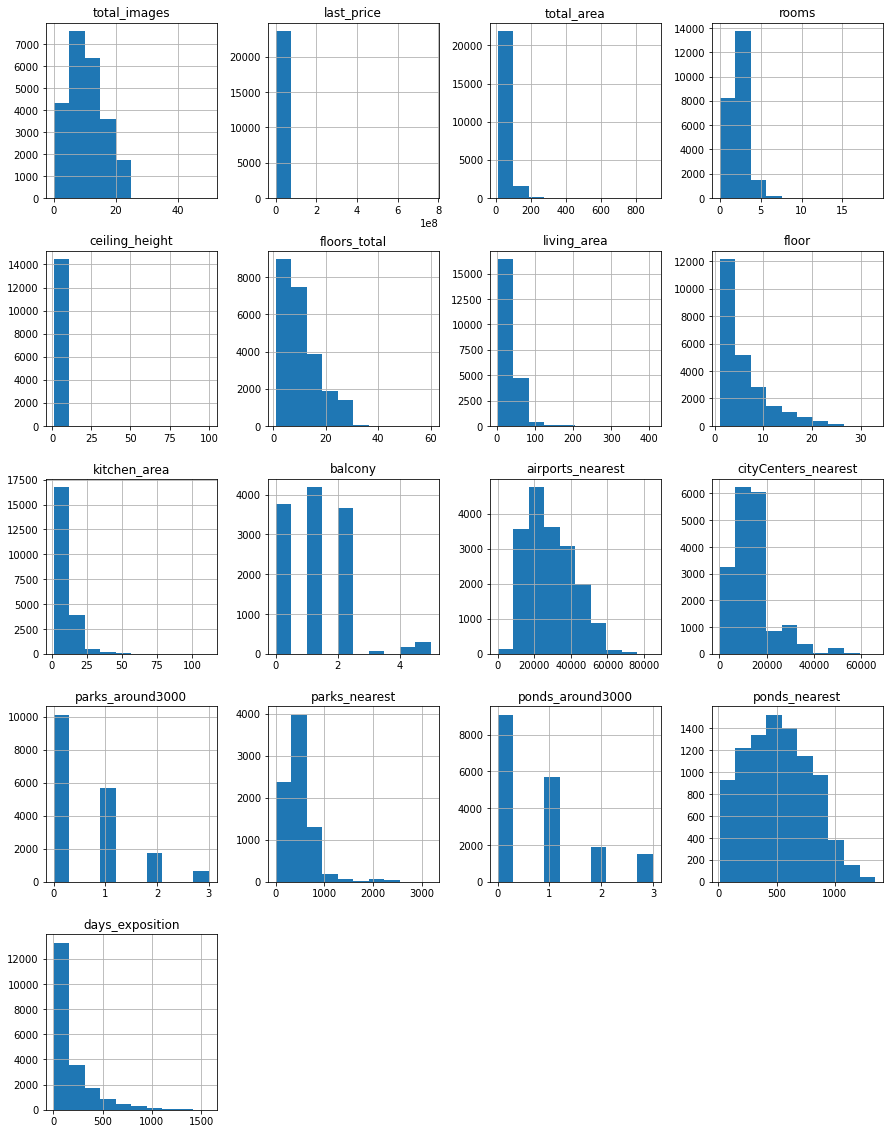

In [4]:
data.hist(figsize=(15, 20))
plt.show()

По графикам видно, что значения в столбцах сремятся к нормальному распределению или распределению Пуассона.

Очевидно, что данные требуют предобработки.

### Предобработка данных

#### Избавимся от пропусков.

В столбцах `total_images`, `balcony`, `days_exposition` целесообразно заменить пропуски на 0, так как скорее всего незаполненные строки появились в связи с отсутствием фото, балконов соответственно и недвижимость была приобретена сразу.

Так как в столбцах `ponds_around3000` , `parks_around3000`, `cityCenters_nearest`, `airports_nearest` имеется практически одинаковое количество пропусков, можно предположить, что эти данные выгружены из базы и информация в ней ограничена. Так как мы не обладаем данными о количестве водоемов, парков, аэропортов, расстоянии до центра города, заполнить эти данные мы не можем и заменить пропуски на 0 будет нецелесообразно и может исказить данные. Заполненных же данных в этих столбцах около 77% и при дальнейшем анализе можно будет отбросить незаполненные строки. Оставим пока эти пропуски.

Как упоминалось выше некоторые столбцы (такие как `"is_apartment"` , `"parks_nearest"`, `"ponds_nearest"`) практически не заполнены. Возможно, информацию об этих данных вносили пользователи и, не имея представления сколько метров до того или иного объекта, оставляли поле незаполненным. Удалить пустые строки в данном случае не представляется возможным, так как их слишком много. В анализе эти данные вероятнее всего не будут учитываться. Вместо некоторых из них будут использоваться столбцы с аналогичными данными (например, `ponds_around3000` , `parks_around3000`)

In [5]:
data['total_images'] = data['total_images'].fillna(0) 
data['balcony'] = data['balcony'].fillna(0)

#### Изменим тип данных.

Многие столбцы в таблице имеют тип данных float, из-за чего дальнейшее использование этих данных в анализе может быть затруднено. Помимо этого в таблице имеется колонка `first_day_exposition`, тип которой очевидно нужно поменять на datetime

Так же, тип данных нужно поменять в столбцах `balcony`, `last_price` так как данные в них являются целыми числами, не имеют пропусков и потребуются для дальнейших расчетов.

In [6]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['balcony'] = data['balcony'].astype('int')
data['last_price'] = data['last_price'].astype('int')

Так как незаполненных строк в столбце `floors_total` мало, их можно удалить, а за тем, поменять тип данных на *int*

In [7]:
data = data.dropna(subset=['floors_total'])
data['floors_total'] = data['floors_total'].astype('int')

Проверим, как изменилась таблица с помощью метода ***info()***

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

#### Приступим к поиску дубликатов.

Так как в `locality_name` внесены названия населенных пунктов целесообразно проверить нет ли опечаток в этом столбце.


In [9]:
print("Количество уникальных наименований:",data['locality_name'].nunique())
data['locality_name'].unique()

Количество уникальных наименований: 364


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

После применения метода ***unique()***, видно, что в данных имеются неявные повторы. Избавимся от них с помощью метода ***replace()***

In [10]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace('деревня Кудрово', 'Кудрово', regex=True)
    .replace('коттеджный поселок', 'поселок', regex=True)
    .replace('садовое товарищество', 'садоводческое некоммерческое товарищество', regex=True)
    .replace('городской поселок', 'поселок городского типа', regex=True)
    .replace('поселок станции', 'поселок при железнодорожной станции', regex=True)
)
print("Количество уникальных наименований:",data['locality_name'].nunique())

Количество уникальных наименований: 319


Проверим наличие явных дубликатов

In [11]:
print("Количество явных дубликатов:", data.duplicated().sum())

Количество явных дубликатов: 0


Оказалось, что дубликатов нет

#### Проверим данные на аномальные и выбивающиеся значения. 

Для этого еще раз построим графики 

<function matplotlib.pyplot.show(close=None, block=None)>

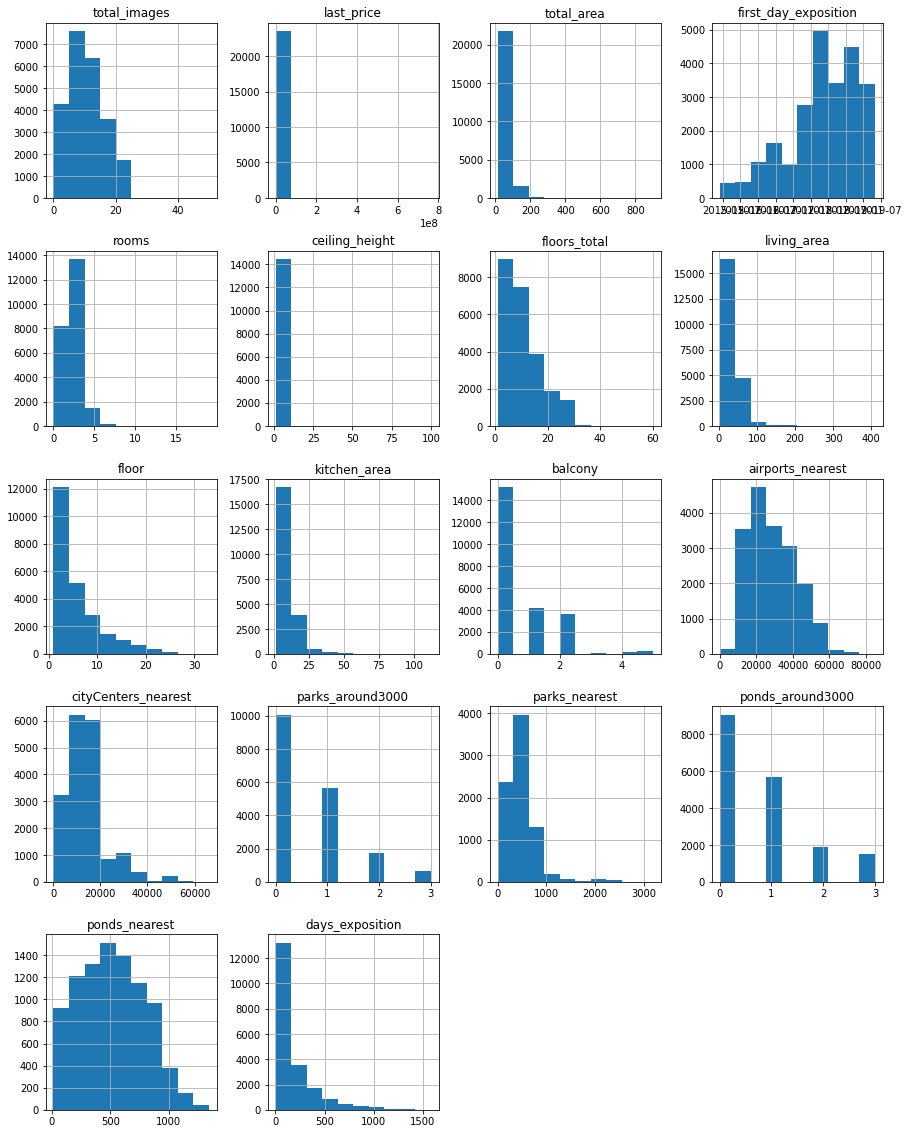

In [12]:
data.hist(figsize=(15, 20))
plt.show

После предобработки данных графики не сильно изменились. Помотрим статистическую сводку каждого столбца, чтобы узнать распределение данных в столбцах

In [13]:
data.describe().round(0)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23613.0,23613.0,23613.0,23613.0,14495.0,23613.0,21743.0,23613.0,21382.0,23613.0,18081.0,18104.0,18105.0,8045.0,18105.0,9061.0,20441.0
mean,10.0,6540555.0,60.0,2.0,3.0,11.0,34.0,6.0,11.0,1.0,28788.0,14185.0,1.0,491.0,1.0,518.0,181.0
std,6.0,10901723.0,36.0,1.0,1.0,7.0,22.0,5.0,6.0,1.0,12626.0,8614.0,1.0,341.0,1.0,278.0,220.0
min,0.0,12190.0,12.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,3400000.0,40.0,1.0,3.0,5.0,19.0,2.0,7.0,0.0,18575.0,9234.0,0.0,288.0,0.0,294.0,45.0
50%,9.0,4650000.0,52.0,2.0,3.0,9.0,30.0,4.0,9.0,0.0,26726.0,13093.0,0.0,455.0,1.0,503.0,95.0
75%,14.0,6799000.0,70.0,3.0,3.0,16.0,42.0,8.0,12.0,1.0,37242.0,16287.0,1.0,612.0,1.0,730.0,232.0
max,50.0,763000000.0,900.0,19.0,100.0,60.0,410.0,33.0,112.0,5.0,84869.0,65968.0,3.0,3190.0,3.0,1344.0,1580.0


Максимальные и минимальные величины в столбцах: `last_price`, `total_area`, `rooms`, `floor`, `ceiling_height`, `living_area`, `kitchen_area`, `airports_nearest`, `cityCenters_nearest`- кажутся неправдоподобными, так как очень сильно отличаются от значения третьего квартиля. Это наводит на мысль, что имеют место аномальные значения.

Самый значимый столбец для анализа - `last_price`. Построим для него диаграмму размаха.

AxesSubplot(0.125,0.125;0.775x0.755)


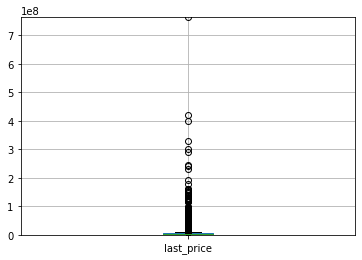

In [14]:
plt.ylim(0,763000000)
print(data.boxplot('last_price'))

Построим аналогичную диаграмму по срезу данных, в которые будет входить стоимость, ограниченная **"верхним усом"** , то есть суммы величины третьего квартиля ***(Q3)*** и умноженной на 1,5 межквартильным размахом ***(Q3-Q1)*** то есть ***Q3+1.5x(Q3-Q1)***, и **"нижним усом"** -  ***Q1- 1.5x(Q3-Q1)***

AxesSubplot(0.125,0.125;0.775x0.755)


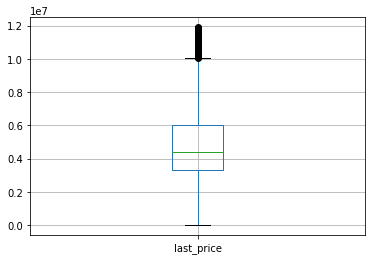

In [15]:
us_top = data['last_price'].describe()['75%']+ \
    (1.5*(data['last_price'].describe()['75%'] - data['last_price'].describe()['25%']))

us_lower = data['last_price'].describe()['25%']- \
    (1.5*(data['last_price'].describe()['75%'] - data['last_price'].describe()['25%']))

data_price_new = data.query('(last_price<= @us_top) & (last_price>=@us_lower)')
print(data_price_new.boxplot('last_price'))

Теперь диаграмма стала более наглядной. Проверим сколько строк было "откинуто" и посмотрим, как изменились статистические значения. 


In [16]:
print("Новый набор данных меньше на ", \
      data['last_price'].count() - data_price_new['last_price'].count(),\
      " строк")
data_price_new['last_price'].describe().round(0)

Новый набор данных меньше на  2049  строк


count       21564.0
mean      4839129.0
std       2217292.0
min         12190.0
25%       3300000.0
50%       4400000.0
75%       6000000.0
max      11894400.0
Name: last_price, dtype: float64

Построим гистограмму

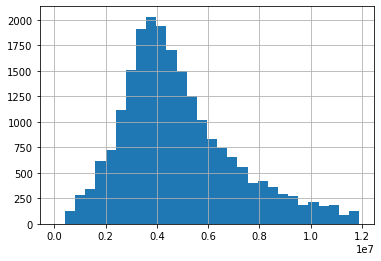

In [17]:
data_price_new['last_price'].hist(bins = 30)
plt.show()

Данные не идеальны, но график выглядит значительно лучше, чем прежде. Соотвтетсвенно далее будем брать для анализа получившийся срез ***(data_price_new)***

Теперь проверим данные в оставшихся столбцах, по аналогии с `last_price`. Создадим функцию с повторяющимися действиями.

In [18]:
# Создаем функцию
def data_processing(list_columns):
    a=0
    for elem in list_columns:       
        # Строим диагараммы размаха до корректировки данных
        print("Диаграмма размаха по данным до обработки:", elem)
        plt.show(data_price_new.boxplot(elem))
    for elem in list_columns:    
        # Рассчитываем длину "усов" 
        us_top = (data_price_new[elem].describe()['75%']+ \
        (1.5*(data_price_new[elem].describe()['75%'] - data_price_new[elem].describe()['25%']))).round(0)
        
        us_lower = (data_price_new[elem].describe()['25%']- \
        (1.5*(data_price_new[elem].describe()['75%'] - data_price_new[elem].describe()['25%']))).round(0)
       
        #Очищаем данные
        data_new = data_price_new.loc[(data_price_new[elem] <= us_top) & (data_price_new[elem] >= us_lower)]
        # Строим диагараммы размаха после корректировки данных
        print("Диаграмма размаха по данным после обработки:", elem)
        plt.show(data_new.boxplot(elem)) 
        # Определяем на какое количество строк уменьшается таблица, если не учитывать вбросы. Столбец 'last_price' 
        # выбран потому, что не имеет пропусков
        print("Набор данных стал меньше на ", \
        data_price_new['last_price'].count() - data_new['last_price'].count(),\
        " строк")
        
        print() 

Диаграмма размаха по данным до обработки: total_area


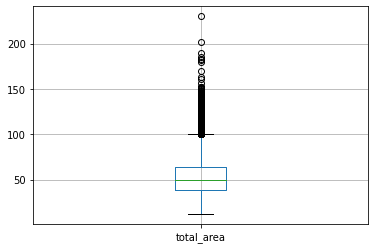

Диаграмма размаха по данным до обработки: rooms


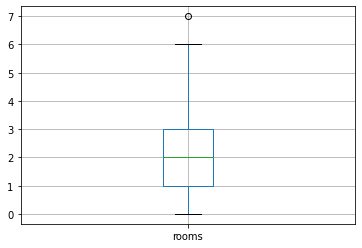

Диаграмма размаха по данным до обработки: floor


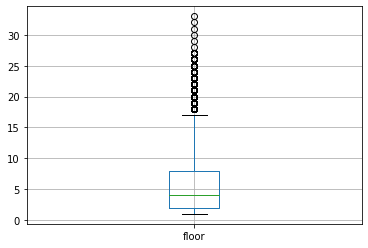

Диаграмма размаха по данным до обработки: ceiling_height


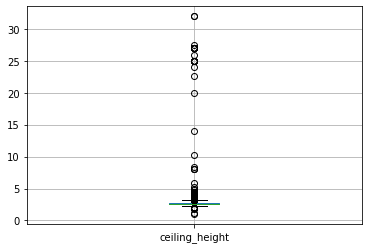

Диаграмма размаха по данным до обработки: living_area


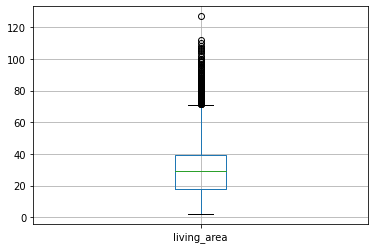

Диаграмма размаха по данным до обработки: kitchen_area


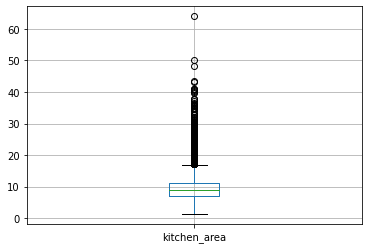

Диаграмма размаха по данным до обработки: airports_nearest


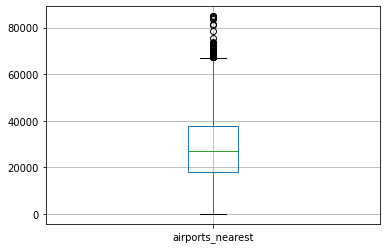

Диаграмма размаха по данным до обработки: cityCenters_nearest


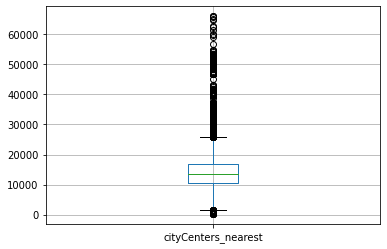

Диаграмма размаха по данным после обработки: total_area


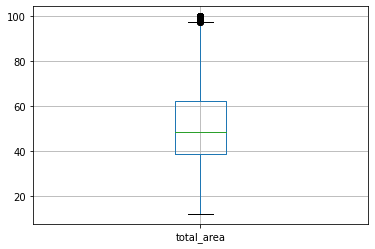

Набор данных стал меньше на  453  строк

Диаграмма размаха по данным после обработки: rooms


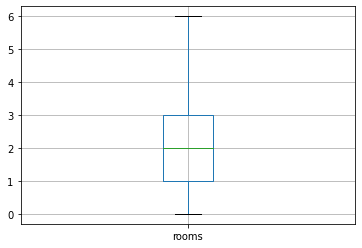

Набор данных стал меньше на  1  строк

Диаграмма размаха по данным после обработки: floor


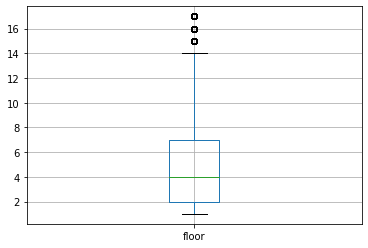

Набор данных стал меньше на  828  строк

Диаграмма размаха по данным после обработки: ceiling_height


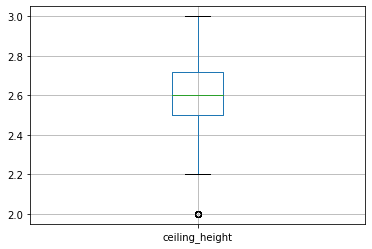

Набор данных стал меньше на  9416  строк

Диаграмма размаха по данным после обработки: living_area


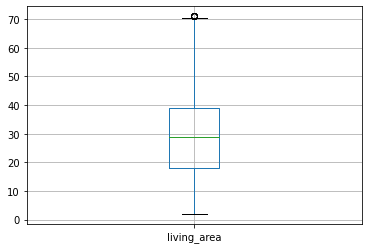

Набор данных стал меньше на  1858  строк

Диаграмма размаха по данным после обработки: kitchen_area


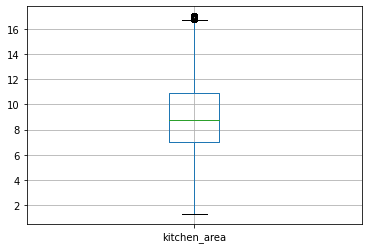

Набор данных стал меньше на  2774  строк

Диаграмма размаха по данным после обработки: airports_nearest


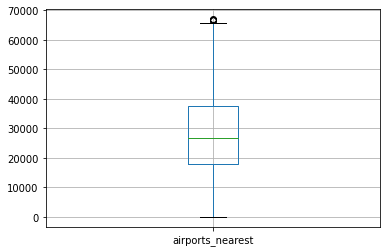

Набор данных стал меньше на  5579  строк

Диаграмма размаха по данным после обработки: cityCenters_nearest


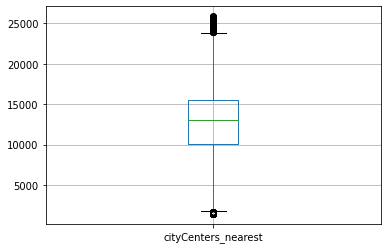

Набор данных стал меньше на  7368  строк



In [19]:
# Создаем список столбцов, требующих корректировки 
bad_columns = ['total_area',
               'rooms',
               'floor',
               'ceiling_height',
               'living_area',
               'kitchen_area',
               'airports_nearest',
               'cityCenters_nearest'
              ]
# Применяем функцию
data_processing(bad_columns)

После обработки данных мы видим, что аномалий стало меньше. Строк, от которых необходимо избавиться, в некоторых случиях мало: `total_area`, `rooms`, `floor`, `living_area`, `kitchen_area`. Соответственно, выборка не станет менее показательной для анализа, если удалить аномалии в этих столбцах. Однако колонки: `cityCenters_nearest`, `airports_nearest`, `ceiling_height`- таким образом преобразовывать нельзя, так как удалится слишком большое количество строк в том числе из-за большого количества пропусков.

Сохриним новую таблицу, без строк, которые было принято удалить выше. Для этого применим снова функцию с небольшими изменениями.

In [20]:
#Сохраняем новый список названий колонок
bad_columns2 = ['total_area',
               'rooms',
               'floor',
               'living_area',
               'kitchen_area'
              ]

# Новая функция
def data_processing_new(list_columns):
    data_new = data_price_new   
    for elem in list_columns:    
        # Рассчитываем длину "усов" 
        us_top = (data_price_new[elem].describe()['75%']+ \
        (1.5*(data_price_new[elem].describe()['75%'] - data_price_new[elem].describe()['25%']))).round(0)
        
        us_lower = (data_price_new[elem].describe()['25%']- \
        (1.5*(data_price_new[elem].describe()['75%'] - data_price_new[elem].describe()['25%']))).round(0)
       
        #Очищаем данные
        data_new = data_new.loc[(data_new[elem] <= us_top) & (data_new[elem] >= us_lower)]  
    return data_new    
#Применим функцию
data_new = data_processing_new(bad_columns2)
#Выведем общее количество удаленных строк
print("Набор данных стал меньше на", (data_price_new['last_price'].count() - data_new['last_price'].count())," строк")

Набор данных стал меньше на 4086  строк


Теперь подробнее рассмотрим столбцы  `cityCenters_nearest`, `airports_nearest`, `ceiling_height`. 
Построим гистограмму.

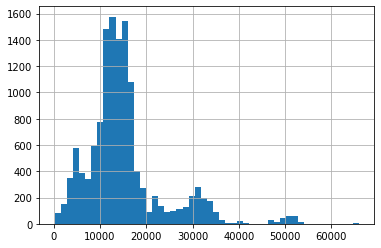

In [21]:
data_new['cityCenters_nearest'].hist(bins = 50)
plt.show()


По графику видно, что строк со значением выше 40000 мало и они не отражают общую тенденцию. Уберем эти строки и построим новый график

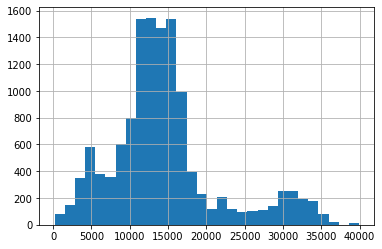

Набор данных стал меньше на 4602  строк


In [22]:
data_new.query('cityCenters_nearest < 40000')['cityCenters_nearest'].hist(bins = 30)
plt.show()
print("Набор данных стал меньше на",(data_new['last_price'].count() -
                                  data_new.query('cityCenters_nearest < 40000')['last_price'].count()),
      " строк")

График стал выглядеть лучше, после того, как было отброшено 4602 строки. Убрать такое количество строк с выбивающимися из общей тенденции данных мы не можем, так как их останется около 60% от первоначальной выборки, что может сказаться на результате анализа. 

По текущему графику видно, что больше всего недвижимости находится в диапазоне от 11 до 17 километров от центра города. 

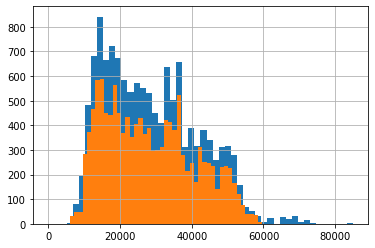

Набор данных стал меньше на 4493  строк


In [23]:
data_new['airports_nearest'].hist(bins = 50)
data_new.query('(airports_nearest < 60000) or (airports_nearest == "")')['airports_nearest'].hist(bins = 50)
plt.show()
print("Набор данных стал меньше на", \
     (data_new['last_price'].count() - \
      data_new.query('(airports_nearest < 60000) or (airports_nearest == "")')['last_price'].count()), " строк")

Аналогично столбцу `cityCenters_nearest`, в `airports_nearest` с помощью среза если отбросить строки с выбивающимися максимальными значениями(больше 60км), то придется не учитывать 4493 строки, что слишком много. Если при дальнейшем анализе понадобятся данные этих столбцов, проведем дополнительную обработку данных

Данные в `ceiling_height` отражают высоту потолков, но в некоторых столбцах она достигает величины в 32 метра, что маловероятно. Посмотрим на уникальные значения этого столбца.

In [24]:
print(data_new['ceiling_height'].sort_values().unique())

[ 1.    1.2   1.75  2.    2.2   2.25  2.3   2.4   2.45  2.46  2.47  2.48
  2.49  2.5   2.51  2.52  2.53  2.54  2.55  2.56  2.57  2.58  2.59  2.6
  2.61  2.62  2.63  2.64  2.65  2.66  2.67  2.68  2.69  2.7   2.71  2.72
  2.73  2.74  2.75  2.76  2.77  2.78  2.79  2.8   2.81  2.82  2.83  2.84
  2.85  2.86  2.87  2.88  2.89  2.9   2.91  2.92  2.93  2.94  2.95  2.96
  2.97  2.98  3.    3.01  3.02  3.03  3.04  3.05  3.06  3.07  3.08  3.09
  3.1   3.11  3.12  3.13  3.14  3.15  3.16  3.17  3.18  3.2   3.21  3.22
  3.23  3.24  3.25  3.27  3.28  3.3   3.31  3.32  3.33  3.34  3.35  3.37
  3.38  3.39  3.4   3.42  3.44  3.45  3.46  3.47  3.48  3.49  3.5   3.54
  3.55  3.56  3.57  3.59  3.6   3.62  3.63  3.65  3.66  3.67  3.7   3.75
  3.78  3.8   3.83  3.85  3.88  3.9   3.95  3.98  4.    4.06  4.1   4.15
  4.19  4.2   4.25  4.3   4.37  4.5   8.    8.3  14.   20.   22.6  24.
 25.   26.   27.   32.     nan]


Создается впечатление, что при выгрузке данных или их заполнении были изменены величины измерения. Создадим дополнительный столбец, в котором значения от 14 до 32 разделим на 10. После, незаполненные строки заполним медианным значением.

[1.   1.2  1.4  1.75 2.   2.2  2.25 2.26 2.3  2.4  2.45 2.46 2.47 2.48
 2.49 2.5  2.51 2.52 2.53 2.54 2.55 2.56 2.57 2.58 2.59 2.6  2.61 2.62
 2.63 2.64 2.65 2.66 2.67 2.68 2.69 2.7  2.71 2.72 2.73 2.74 2.75 2.76
 2.77 2.78 2.79 2.8  2.81 2.82 2.83 2.84 2.85 2.86 2.87 2.88 2.89 2.9
 2.91 2.92 2.93 2.94 2.95 2.96 2.97 2.98 3.   3.01 3.02 3.03 3.04 3.05
 3.06 3.07 3.08 3.09 3.1  3.11 3.12 3.13 3.14 3.15 3.16 3.17 3.18 3.2
 3.21 3.22 3.23 3.24 3.25 3.27 3.28 3.3  3.31 3.32 3.33 3.34 3.35 3.37
 3.38 3.39 3.4  3.42 3.44 3.45 3.46 3.47 3.48 3.49 3.5  3.54 3.55 3.56
 3.57 3.59 3.6  3.62 3.63 3.65 3.66 3.67 3.7  3.75 3.78 3.8  3.83 3.85
 3.88 3.9  3.95 3.98 4.   4.06 4.1  4.15 4.19 4.2  4.25 4.3  4.37 4.5
 8.   8.3 ]


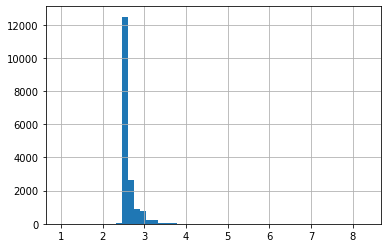

In [25]:
# Заменяем значения от 14 до 32
data_new['ceiling_height_good'] = data_new['ceiling_height']
data_new.loc[data_new['ceiling_height_good'] > 10, 'ceiling_height_good'] /= 10

data_new['ceiling_height_good'] = data_new['ceiling_height_good'] \
                                 .fillna(data_new['ceiling_height_good'].median())
print(data_new['ceiling_height_good'].sort_values().unique())
data_new['ceiling_height_good'].hist(bins = 50)
plt.show()

Осталисть в столбце значения высоты потолка в 8 метров и выше. Проверим, сколько таких строк

In [26]:
print("Строк с высотой от 8м - ", data_new.loc[data_new['ceiling_height_good']>=8]['ceiling_height_good'].count())

Строк с высотой от 8м -  3


Всего три строки. Избавимся от них.

In [27]:
data_new = data_new[data_new['ceiling_height_good']<8]

После предобработки данных, таблица для анализа стала такой:

In [28]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17475 entries, 1 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          17475 non-null  int64         
 1   last_price            17475 non-null  int64         
 2   total_area            17475 non-null  float64       
 3   first_day_exposition  17475 non-null  datetime64[ns]
 4   rooms                 17475 non-null  int64         
 5   ceiling_height        11057 non-null  float64       
 6   floors_total          17475 non-null  int64         
 7   living_area           17475 non-null  float64       
 8   floor                 17475 non-null  int64         
 9   is_apartment          2074 non-null   object        
 10  studio                17475 non-null  bool          
 11  open_plan             17475 non-null  bool          
 12  kitchen_area          17475 non-null  float64       
 13  balcony         

В разделе были по-возможности убраны пропуски из данных. Изменен тип данных в некоторых столбцах. Данные были проверены на наличие дубликатов. Так же была произведена проверка выборки на аномальные и выбивающиеся значения

### Посчитайте и добавьте в таблицу новые столбцы

#### Рассчет стоимости одного квадратного метра

Теперь рассчитаем стоимость одного квадратного метра. 
Для этого создадим столбец `prise_one_m`

<AxesSubplot:>

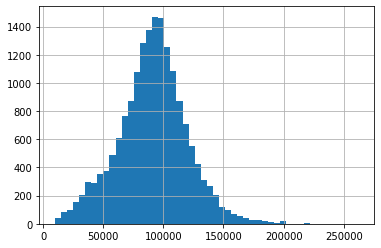

In [29]:
data_new['prise_one_m'] = data_new['last_price'] / data_new['total_area']
# Построим гистограмму, чтобы посмотреть какое получилось распределение
data_new['prise_one_m'].hist(bins=50)

Данные в столбце образуют гистограмму с нормальным распределением

#### Добавление столбца с классификацией дней недели

С помощью ***dt.weekday*** определим день недели(0 - понедельник, 1 - вторник и т.д.) первого дня экспозиции через колонку `first_day_exposition`. Создадим новый столбец `day_of_week_exposition` с этими данными и выведем его на экран.

In [30]:
data_new['day_of_week_exposition'] = data_new['first_day_exposition'].dt.weekday
print(data_new['day_of_week_exposition'].head(5))

1    1
2    3
5    0
6    3
9    6
Name: day_of_week_exposition, dtype: int64


#### Добавление столбца с месяцем публикации объявления


In [31]:
data_new['month_exposition'] = data_new['first_day_exposition'].dt.month
print(data_new['month_exposition'].head(5))

1    12
2     8
5     9
6    11
9     2
Name: month_exposition, dtype: int64


#### Добавление столбца с годом публикации объявления

In [32]:
data_new['year_exposition'] = data_new['first_day_exposition'].dt.year
print(data_new['year_exposition'].head(5))

1    2018
2    2015
5    2018
6    2017
9    2017
Name: year_exposition, dtype: int64


#### Добавление столбца с расстоянием в км до центра города

In [33]:
data_new['cityCenters_nearest_km'] = (data_new['cityCenters_nearest']/1000).round(0)
print(data_new['cityCenters_nearest_km'])

1        19.0
2        14.0
5         NaN
6        19.0
9        15.0
         ... 
23691     4.0
23692     NaN
23693    34.0
23695     NaN
23698     NaN
Name: cityCenters_nearest_km, Length: 17475, dtype: float64


#### Добавление столбца с типом этажей квартиры 

Для присвоения типов по этажу конкретной недвижимости воспользуемся циклом

In [34]:
# Данные разбиваются по типам: «первый», «последний», «другой»
def categorize_floor(floor):
    try:
        if floor['floor'] == 1:
            return 'первый'
        elif floor['floor'] == floor['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        pass

data_new['floor_tipe'] = data_new[['floor', 'floors_total']].apply(categorize_floor, axis=1)
print(data_new['floor_tipe'].value_counts())

другой       12696
последний     2413
первый        2366
Name: floor_tipe, dtype: int64


Категория "другой" самая большая, как и предполагалось

В этом разделе были посчитаны и добавлены в таблицу такие данные как:
- Рассчет стоимости одного квадратного метра
- Информация о днях недели публикации объявления о продаже недвижимости
- Информация о месяце и годе публикации объявления
- Рассчет расстояния в км до центра города
- Информация о типе этажей квартир

### Проведите исследовательский анализ данных

Приступим к анализу данных.

  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления

 #### Площадь недвижимости и количество комнат.
 
 В данных имеется информация о площади квартир в столбцах `total_area`, `living_area`, `kitchen_area`.
 Для удобства добавим классификацию данных в дополнительный столбец `total_area_group`

<AxesSubplot:>

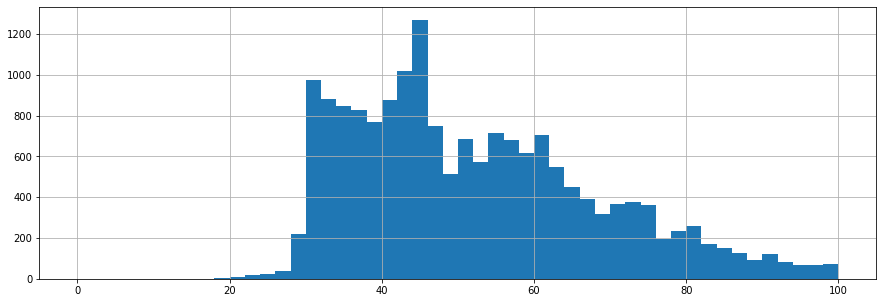

In [35]:
##### Построим график, чтобы посмотреть как распределены площади
data_new['total_area'].hist(bins=50,range=(0,100), figsize = (15,5))

In [36]:
# Выполняем группировку площадей квартиры(общей площади) по классам: "от 14 до 30", "от 30 до 50",
# "от 50 до 70", "от 70 до 100"
def caregory_area(row):
    try:
        if row['total_area'] >=14 and row['total_area']<30:
            return "от 14 до 30"
        elif row['total_area']>=30 and row['total_area']<50:
            return "от 30 до 50"
        elif row['total_area']>=50 and row['total_area']<70:
            return "от 50 до 70"
        else:
            return "от 70 до 100"
    except:
        pass
#Применяем функцию
data_new['total_area_group']=data_new.apply(caregory_area, axis = 1)


In [37]:
data_new.groupby('total_area_group').count().sort_values('total_area')['total_area']

total_area_group
от 14 до 30      308
от 70 до 100    2751
от 50 до 70     5683
от 30 до 50     8733
Name: total_area, dtype: int64

Среди исследуемого жилья, чаще всего встречается площадь квартир от 30 до 50 м2

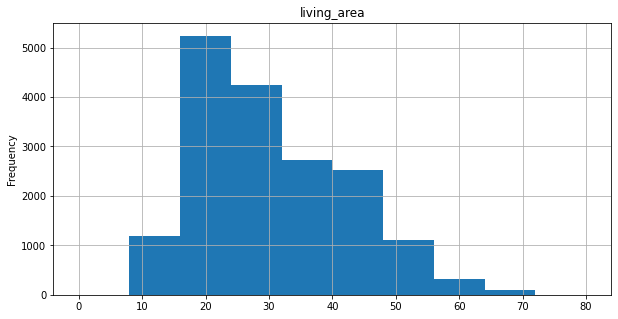

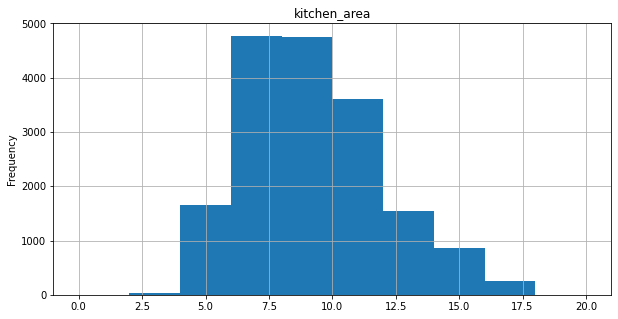

,kitchen_area,living_area,total_area
total_area_group,,,
от 30 до 50,8.0,18.6,40.0


In [38]:
data_new['living_area'].plot(y='living_area', kind = 'hist',title ='living_area',
                             bins=10, range=(0,80),figsize = (10,5),grid=True)
plt.show()
data_new['kitchen_area'].plot(y='kitchen_area', kind = 'hist',title ='kitchen_area',
                              bins=10, range=(0,20),figsize = (10,5),grid=True)
plt.show()
#### Срез недвижимости с общей площадью от 30 до 50
data_new.query('total_area_group == "от 30 до 50"') \
.pivot_table(index='total_area_group', 
             values=['total_area','living_area','kitchen_area'], 
             aggfunc='median')

Мы видим, что наиболее часто в данных встречается жилая площадь размером от 18 до 32 м2, а кухонь - от 6 до 10м2

При общей площади от 30 до 50м2(наиболее популярной), величина кухни - 8м2, жилая площадь - 18.6м2, а общая  - 40 м2.

Посмотрим какое количество комнат преобладает в данных объявлениях

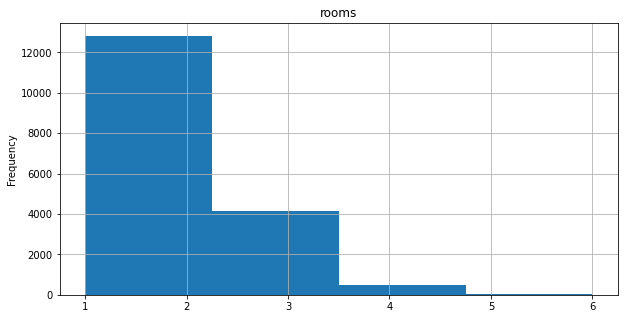

In [39]:
data_new['rooms'].plot(y='rooms', kind = 'hist',title ='rooms',
                              bins=4,figsize = (10,5),grid=True)
plt.show()

Мы видим, что больше всго продается однокомнатных квартир, что коррелирует с общей площадью в 40м2

#### Цена объекта.

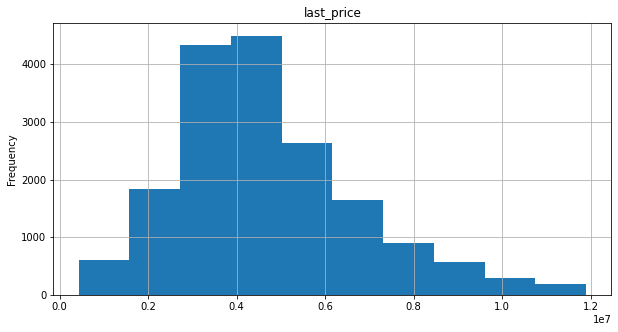

In [40]:
data_new['last_price'].plot(y='last_price', kind = 'hist',title ='last_price',
                              bins=10,figsize = (10,5),grid=True)
plt.show()

In [41]:
data_new['last_price'].value_counts().head(15)

4500000    287
3500000    247
4200000    233
4300000    226
4000000    221
3600000    219
3800000    216
3300000    204
3700000    201
4100000    200
3200000    200
3400000    199
3100000    197
5500000    195
4600000    192
Name: last_price, dtype: int64

Наиболее популярной ценой продажи является 4.5 млн. Посмотрим какие прочие характеристики у такого жилья

In [42]:
#### Срез недвижимости стоимостью 4.5 млн.
data_new.query('last_price == 4500000') \
.pivot_table(index='last_price',
#             columns=['total_area','rooms','cityCenters_nearest'], 
             values=['total_area','rooms','cityCenters_nearest','parks_around3000','ponds_around3000','airports_nearest'], 
             aggfunc='median')


,airports_nearest,cityCenters_nearest,parks_around3000,ponds_around3000,rooms,total_area
last_price,,,,,,
4500000,28116.0,14211.0,0.0,0.0,2,46.4


По цене 4.5 млн в среднем, продавались двухкомнатные квартиры с общей площадью 46.4м2, в 28 км от цента города, 14 км от аэропорта и без парков и озер в радиусе 3км 

#### Расстояние до центра города, аэропорта, парка

Построим гистограммы с соответствующими данными

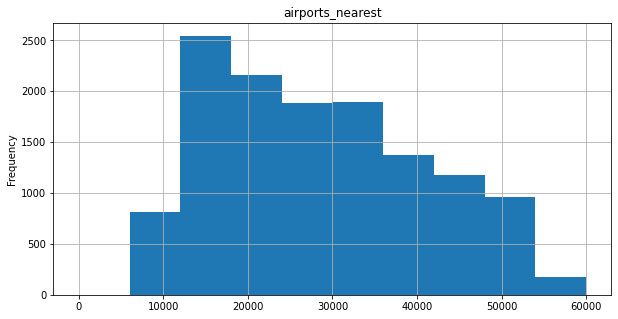

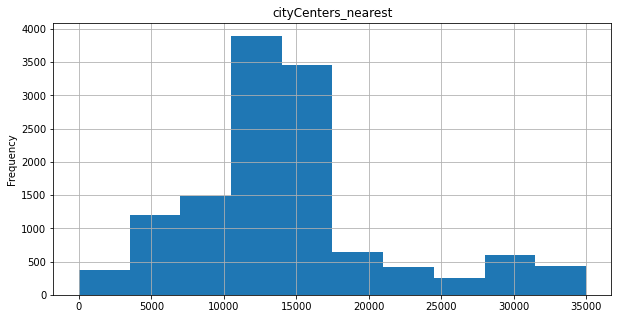

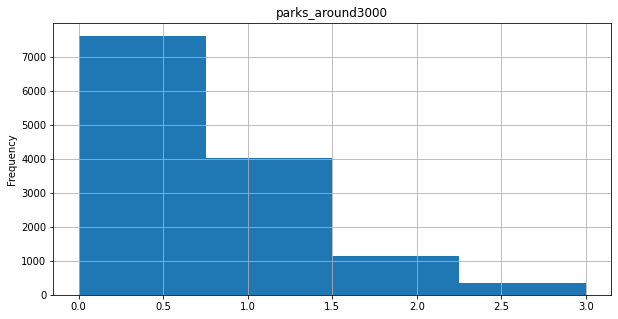

0.0    7616
1.0    4032
2.0    1135
3.0     352
Name: parks_around3000, dtype: int64

In [43]:
data_new['airports_nearest'].plot(y='airports_nearest', kind = 'hist',title ='airports_nearest',
                              bins=10, range=(0,60000), figsize = (10,5), grid=True)
plt.show()

data_new['cityCenters_nearest'].plot(y='cityCenters_nearest', kind = 'hist',title ='cityCenters_nearest',
                              bins=10, range=(0,35000), figsize = (10,5),grid=True)
plt.show()

data_new['parks_around3000'].plot(y='parks_around3000', kind = 'hist',title ='parks_around3000',
                              bins=4,figsize = (10,5),grid=True)
plt.show()

data_new['parks_around3000'].value_counts()

В данных преобладает недвижимость с удаленностья от аэропортов от 13 до 25 км, от центра города от 11 до 17км и без парков в радиусе 3 км

#### Общее количество этажей, этаж квартиры

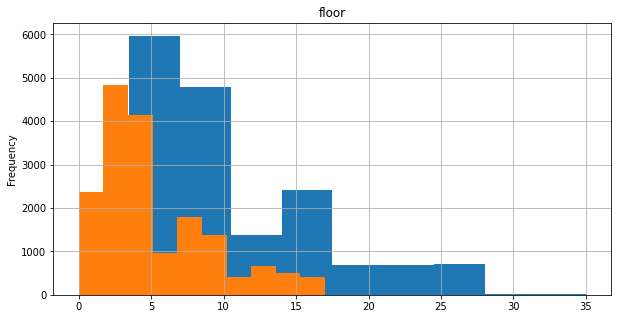

Распределение данных по общему количеству этажей в доме
 5     4681
9     3334
12    1097
16    1038
10     917
4      781
17     665
25     565
6      504
3      489
Name: floors_total, dtype: int64

Распределение данных по этажу недвижимости
 2     2519
1     2366
3     2313
4     2120
5     2031
6      966
7      945
9      869
8      853
10     514
11     411
12     393
13     266
14     262
15     247
16     241
17     159
Name: floor, dtype: int64


In [44]:
data_new['floors_total'].plot(y='floors_total', kind = 'hist',title ='floors_total',
                              bins=10, range=(0,35),figsize = (10,5),grid=True)
data_new['floor'].plot(y='floor', kind = 'hist',title ='floor',
                              bins=10, range=(0,17),figsize = (10,5),grid=True)
plt.show()
print("Распределение данных по общему количеству этажей в доме\n",data_new['floors_total'].value_counts().head(10))
print()
print("Распределение данных по этажу недвижимости\n",data_new['floor'].value_counts())

Построим гистограмму по типу этажа

<function matplotlib.pyplot.show(close=None, block=None)>

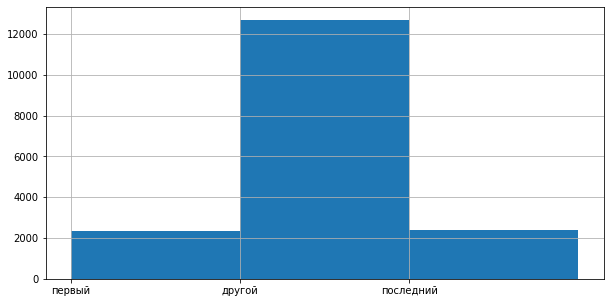

In [45]:
data_new['floor_tipe'].hist(bins=3, range=(0,3),figsize = (10,5),grid=True)
plt.show

Тип этажа "другой" преобладает. Предложений на первом и последнем этаже практически поровну.

По графикам и по таблицам видно, что количество объявлений о недвижимости в пятиэтажных домах преобладает, а продаются квартиры в основном на нижних этажах- от 1 до 5. 

#### День и месяц публикации объявления

In [46]:
data_new.pivot_table(index=['year_exposition',
                            'month_exposition',
                            'first_day_exposition'], 
             values='last_price', 
             aggfunc='count').sort_values('last_price',ascending=False)

last_price
year_exposition month_exposition first_day_exposition            
2018            2                2018-02-01                   273
2017            11               2017-11-10                   175
                10               2017-10-13                   105
                9                2017-09-27                    80
2018            3                2018-03-26                    73
...                                                           ...
2015            8                2015-08-07                     1
                7                2015-07-31                     1
                                 2015-07-28                     1
                                 2015-07-27                     1
                12               2015-12-25                     1

[1445 rows x 1 columns]

Самым популярным для публикации объявления стало 1 февраля 2018 года. При этом преобладающее большинство объявлений размещено в 2017 году.

#### Высота потолков.

<AxesSubplot:title={'center':'ceiling_height'}, ylabel='Frequency'>

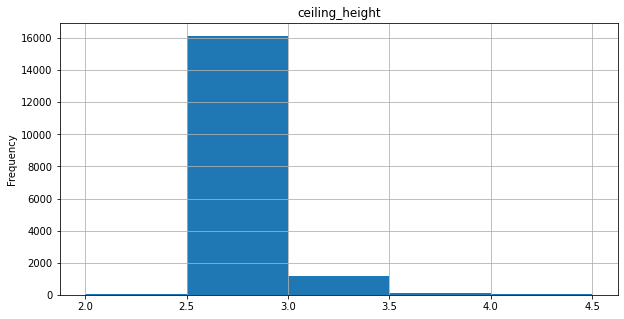

In [47]:
data_new['ceiling_height_good'].plot(y='ceiling_height_good', kind = 'hist',title ='ceiling_height',
                              bins=5,range=(2,4.5),figsize = (10,5),grid=True)

Стандартный размер высоты потолков в России - 2,5 метра, что и отражает данный график

#### Скорость продажи квартир

Построим гистограмму по столбцу `days_exposition`, данные которого отражают скорость продажи квартир

<AxesSubplot:title={'center':'days_exposition'}, ylabel='Frequency'>

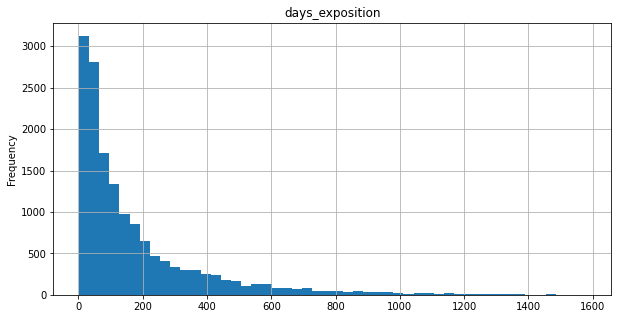

In [48]:
data_new['days_exposition'].plot(y='days_exposition', kind = 'hist',title ='days_exposition',
                              bins=50,figsize = (10,5),grid=True)

Теперь рассчитаем медиану и среднее арифметическое

In [49]:
print('days\t','count\n', data_new['days_exposition'].value_counts().head(10))
print()
print('Продано за 45 дней',round(data_new['days_exposition'].value_counts().head(10).max()/
      data_new['days_exposition'].value_counts().head(10).sum()*100,0).astype('int'),'% от общего числа')
print()
print('Статистические показатели days_exposition \n', data_new['days_exposition'].describe().round(0))

days	 count
 45.0    488
60.0    300
7.0     182
30.0    172
4.0     140
3.0     134
5.0     120
14.0    116
20.0    115
8.0     113
Name: days_exposition, dtype: int64

Продано за 45 дней 26 % от общего числа

Статистические показатели days_exposition 
 count    15285.0
mean       175.0
std        210.0
min          1.0
25%         42.0
50%         95.0
75%        223.0
max       1580.0
Name: days_exposition, dtype: float64


По данным видно, что много недвижимости было продано за 45 дней(26%). Среднее время продажи - 175 дней, однако на это значение может влиять большой разброс значений(от 1 до 1580 дней), поэтому целесообразно обратить внимание именно на медиану(42).

Разобъем данные на 3 категории:
- "до 42 дней" - быстрые продажи, 42дня-это значение первого квартиля
- "от 42 до 224 дней" - среднее время продажи, 223 - третий квартиль
- "от 224 дней" - медленные продажи

In [50]:
def catregory_days_exposition(row):
    try:
        if row['days_exposition']<42:
            return "Быстрые продажи(от 1 до 42 дней)"
        elif row['days_exposition']>=42 and row['days_exposition']<=223:
            return "Среднее время продаж(от 42 до 224 дней)"
        else:
            return "Медленные продажи(от 224 дней)"
    except:
        pass
#Применяем функцию
data_new['category_days_exposition']=data_new.apply(catregory_days_exposition, axis = 1)

#Построим сводную таблицу
data_exposition = data_new.pivot_table(index='category_days_exposition', 
                     values='days_exposition', 
                     aggfunc=['count','mean','median']).round(0).astype(int).sort_values(('mean', 'days_exposition'))
data_exposition['%']=round((data_exposition['count']/data_exposition['count'].sum()*100),0).astype(int)
data_exposition.columns = ['count','mean','median','%']
data_exposition

,count,mean,median,%
category_days_exposition,,,,
Быстрые продажи(от 1 до 42 дней),3753,20,19,25
Среднее время продаж(от 42 до 224 дней),7723,107,95,51
Медленные продажи(от 224 дней),3809,465,390,25


Таким образом, можно отметить, что среди быстрых продаж средним можно назвать 20 дней. 

В категории среднее время продаж медиана остается той же, а среднее арифметическое изменилось с 175 до 107, что произошло из-за отброса медленных продаж. 

Среди медленных продаж средним количеством дней стало 465 дня. 

Так же можно отметить, что имеются и крайне медленные продажи, вплоть до 1580 дней, но их очень мало. По графику видно, что уже от 500 дней продаж становится все меньше.

#### Факторы, влияющие на общую (полную) стоимость объекта

##### Влияние площади на стоимость

In [51]:
#Создаем функцию для построения сводной таблицы

def df_pivot(ind,valu):
    df = data_new.pivot_table(index= ind, 
                              values= valu,
                              aggfunc='median')
    return df.round(0).astype('int')

#Строим таблицу
data_korr_sq = df_pivot('total_area_group',['last_price','total_area','living_area','kitchen_area'])
data_korr_sq =data_korr_sq[['last_price','total_area','living_area','kitchen_area']]
data_korr_sq

,last_price,total_area,living_area,kitchen_area
total_area_group,,,,
от 14 до 30,2860000,29,15,6
от 30 до 50,3650000,40,19,8
от 50 до 70,5150000,58,35,9
от 70 до 100,7000000,78,48,11


Построим графики зависимости

Коэффициенты корреляции
               kitchen_area  last_price  living_area  total_area
kitchen_area         1.000       0.520        0.371       0.544
last_price           0.520       1.000        0.812       0.857
living_area          0.371       0.812        1.000       0.958
total_area           0.544       0.857        0.958       1.000


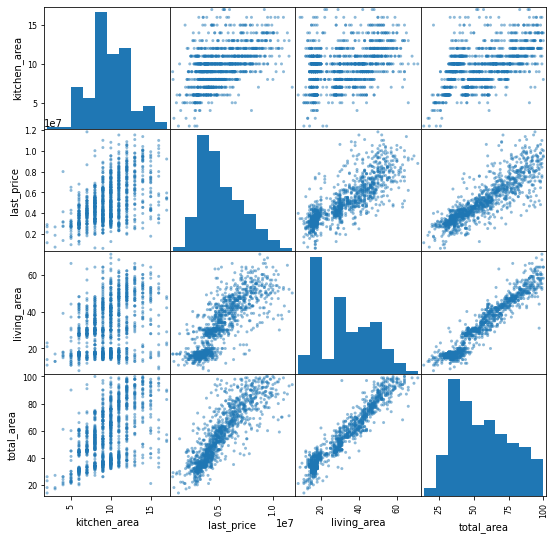

In [52]:
data_new['total_area_pivot'] = data_new['total_area']
data_korr_sq_2 = df_pivot('total_area_pivot',['last_price','total_area','living_area','kitchen_area'])
pd.plotting.scatter_matrix(data_korr_sq_2, figsize = (9,9))
plt.show
print("Коэффициенты корреляции\n",round(data_korr_sq_2.corr(),3))

И графики и коэффициенты показывают прямую зависимость стоимости квартиры от площади (как общей(коэффициент 0.86), так и жилой(коэффициент 0.81) и площади кухни(0.52))

#####  Влияние количества комнат на стоимость

Коэффициенты корреляции
             last_price  rooms
last_price       1.000  0.878
rooms            0.878  1.000


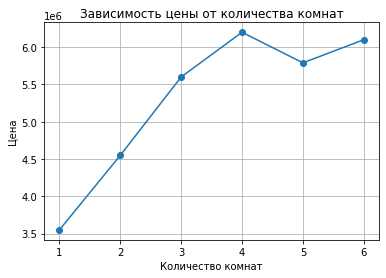

In [53]:
data_new['rooms_pivot']=data_new['rooms']
#Строим таблицу
data_korr_room = df_pivot('rooms_pivot',['last_price','rooms'])
print("Коэффициенты корреляции\n",round(data_korr_room.corr(),3))
plt.plot(data_korr_room['rooms'], data_korr_room['last_price'], marker='o')
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.grid(True)

Мы наблюдаем прямую зависимость стоимости от количества комнат, коэффициент корреляции равен 0.88

##### Влияние типа этажа на стоимость 

In [54]:
#Строим таблицу
data_korr_floor = df_pivot('floor_tipe',['last_price','floor'])
print("Коэффициенты корреляции\n",round(data_korr_floor.corr(),3))
data_korr_floor.sort_values('last_price',ascending=False)

Коэффициенты корреляции
             floor  last_price
floor       1.000       0.467
last_price  0.467       1.000


,floor,last_price
floor_tipe,,
другой,4,4500000
последний,5,3950000
первый,1,3800000


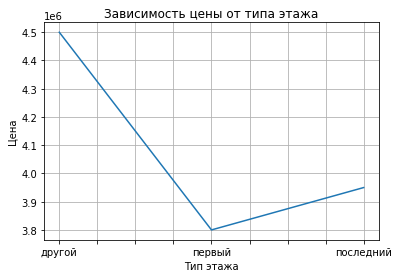

In [55]:
data_new.groupby('floor_tipe')['last_price'].median().plot()
plt.title('Зависимость цены от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена') 
plt.grid(True)

Коэффициэнт показывает нам прямую зависимость(0.47). По таблице и графику мы видим, что первый и последний этажи стоят дешевле, чем прочие.

##### Влияние даты размещения на стоимость

Коэффициенты корреляции
 last_price                1.000
year_exposition          -0.053
month_exposition          0.031
day_of_week_exposition   -0.011
Name: last_price, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

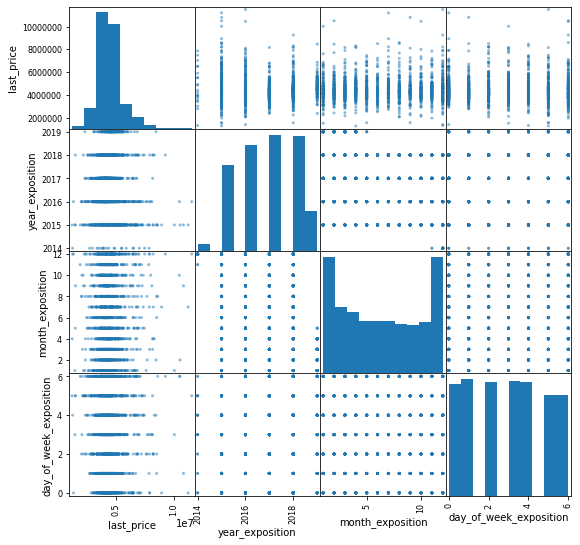

In [56]:
#Строим таблицу
data_korr_time = df_pivot('first_day_exposition',['last_price','year_exposition','month_exposition','day_of_week_exposition'])
data_korr_time = data_korr_time[['last_price','year_exposition','month_exposition','day_of_week_exposition']]
#Рассчет коэффициентов корреляции
print("Коэффициенты корреляции\n",round(data_korr_time.corr(),3)['last_price'])
pd.plotting.scatter_matrix(data_korr_time, figsize = (9,9))
plt.show

На большинстве графиков диаграмм рассеяния нет явной линейной зависимости, что указывает на отсутствие сильной корреляции между этими переменными, что подтверждается и коэффициентами корреляции, которые близки к 0

None


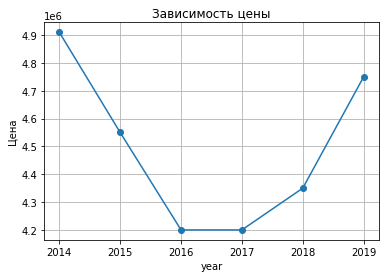

In [57]:
#Создадим функцию
def dataplot(time):
    #Новый столбец для построения сводной
    data_new['t'] = data_new[time]
    #Строим сводную таблицу
    data_korr_time_n = df_pivot('t',[time,'last_price'])
    #Строим график
    plt.plot(data_korr_time_n[time],data_korr_time_n['last_price'], marker='o')
    plt.title('Зависимость цены')
    plt.xlabel(time.split("_")[0])
    plt.ylabel('Цена') 
    plt.grid(True)
    
print(dataplot('year_exposition'))

None


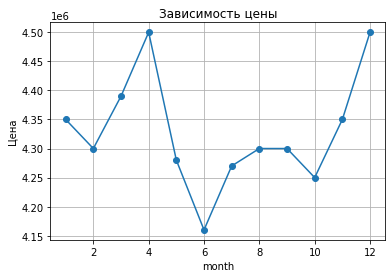

In [58]:
print(dataplot('month_exposition'))

None


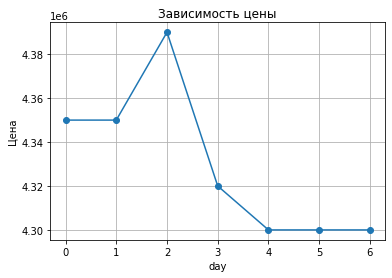

In [59]:
print(dataplot('day_of_week_exposition'))

Графики, отражающие зависимость между ценой и годом, месяцем, днем недели, так же показывают, что прямой или обратной зависимости цены от этих показателей нет.

Можно отметить, что самые пиковые цены были в 2014 году, в 2016-2017 наблюдалась стогнация после спада цен и в 2018-2019 цены снова стали расти и почти достигли 2014 года. Скорее всего такой спад произошел из-за кризиса 2015 года.

При анализе продаж по месяцам, можно отметить, что максимальные цены наблюдаются в апреле и декабре. Минимальные в июне.

График по дням недели показывает, что наиболее высокие цены у объявлений, которые были размещены в среду

#### Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [60]:
#Строим таблицу
data_mean_price = round(data_new.pivot_table(index= 'locality_name', 
                              values= ['last_price','prise_one_m'],
                              aggfunc=['median','count']).sort_values(('count','last_price'),ascending=False),2)
#Удаляем столбец 'count', 'prise_one_m'
data_mean_price.drop(('count', 'prise_one_m'), axis=1, inplace=True)
data_mean_price.head(10)

median                  count
                  last_price prise_one_m last_price
locality_name                                      
Санкт-Петербург    5000000.0   101351.35      11123
поселок Мурино     3500000.0    84037.46        352
поселок Шушары     3900000.0    77272.73        351
Всеволожск         3410000.0    65667.56        342
Колпино            3550000.0    74722.22        309
Кудрово            3850000.0    96787.83        303
Пушкин             4890000.0    98039.22        289
Гатчина            3015030.0    67671.51        280
поселок Парголово  4140000.0    90809.63        201
Петергоф           3700000.0    81803.03        180

Таблица показывает 10 населённых пунктов с наибольшим числом объявлений. Из этой выборки мы видим, что максимальная стоимость 1м2 в Санкт-Петербурге, составляет 101 351.35. На втором месте по стоимости н.п. Пушкин - 98 039.22.

Минимальная стоимость 1м2 среди этих населенных пунктов в Всеволожске (65 667.56)

#### Cредняя цена каждого километра в Санкт-Петербурге

Коэффициенты корреляции
                         cityCenters_nearest_km  prise_one_m
cityCenters_nearest_km                   1.000       -0.358
prise_one_m                             -0.358        1.000


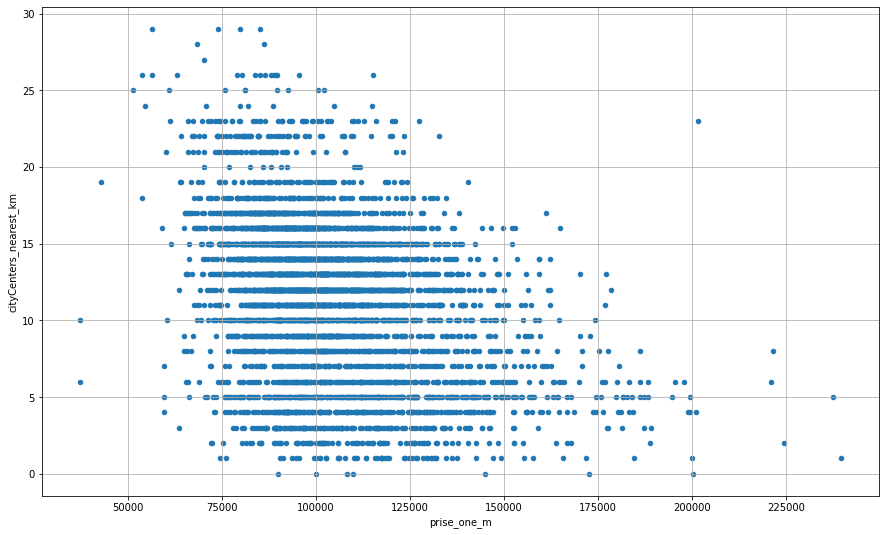

In [61]:
#Строим таблицу
data_mean_price_cityCenters = round(data_new[data_new['locality_name']=='Санкт-Петербург']
                                    .pivot_table(index= 'cityCenters_nearest', 
                                     values= ['cityCenters_nearest_km','prise_one_m'],
                                     aggfunc='mean').sort_values('cityCenters_nearest_km',ascending=False),2)
#Строим график
data_mean_price_cityCenters.plot(x='prise_one_m',
                                 y='cityCenters_nearest_km',
                                 kind='scatter',
                                 figsize = (15,9),
                                 grid=True)
print("Коэффициенты корреляции\n",round(data_mean_price_cityCenters.corr(),3))

И график и коэффициэнты нам иллюстрируют наличие несильной(-0.36) обратной зависимости стоимости одного метра от расстояния в километрах от центра города. То есть, чем дальше от города, тем стоимость одного м2 будет меньше.

Посмотрим, как будут выглядеть эти данные на линейной диаграмме.

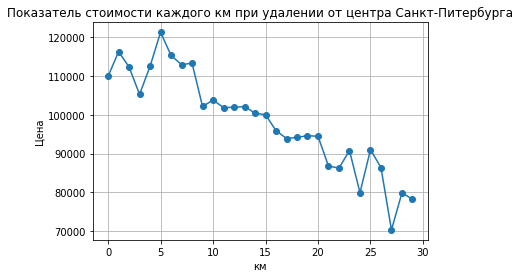

In [62]:
data_new['cityCenters_nearest_km2']=data_new[data_new['locality_name']=='Санкт-Петербург']['cityCenters_nearest_km']

#Строим сводную
data_mean_price_cityCenters2 = df_pivot('cityCenters_nearest_km2',['cityCenters_nearest_km','prise_one_m'])
#Строим график
plt.plot(data_mean_price_cityCenters2['cityCenters_nearest_km'],data_mean_price_cityCenters2['prise_one_m'], marker='o')
plt.title('Показатель стоимости каждого км при удалении от центра Санкт-Питербурга')
plt.xlabel('км')
plt.ylabel('Цена')
plt.grid(True)

На этом графике мы так же наблюдаем снижение цены за 1м2 при удалении от центра города.

В данном разделе были проанализированы и описаны такие показатели, как:
 - общая площадь;
 - жилая площадь;
 - площадь кухни;
 - цена объекта;
 - количество комнат;
 - высота потолков;
 - этаж квартиры;
 - тип этажа квартиры («первый», «последний», «другой»);
 - общее количество этажей в доме;
 - расстояние до центра города в метрах;
 - расстояние до ближайшего аэропорта;
 - расстояние до ближайшего парка
 
Были определены наиболее значимые ценообразующие факторы - это оказалось количество комнат с коэффициентом корреляции 0.89. Так же можно отметить такой значимый фактор цены, как общая площадь квартиры с коэффициектом корреляции  0.86. Тип этажа, как показал анализ оказывает влияние на стоимость квартир, но имеют меньшую значимость.

Прямой или обратной зависимости от даты размещения объявления обнаружено не было.
 
Было выяснено, что местонахождение недвижимости так же является весомым фактором. Так, стоимость 1м2 в Санкт-Петербурге самая высокая и чем ближе жилье находится к центру города, тем выше его стоимость.

### Общий вывод

В ходе предобработки данных был рассмотрен файл с информацией о продажах недвижимости в 2014 - 2019 году. 
Были по-возможности убраны пропуски из данных. Изменен тип данных в некоторых столбцах. Так же была проведена проверка наличия дубликатов. Много внимания была уделено проверки выборки данных на аномальные и выбивающиеся значения.

Далее, в таблицу были добавлены дополнительные столбцы, для упрощения дальнейшего анализа

Исследовательский анализ данных показал, что наиболее значимым факторов в ценообразовании недвижимости является количество комнат. Чуть менее значимым факторов оказалась общая плоцадь (что в свою очередь прямопропорцианально связано и с количеством комнат).

Тип этажа так же имеет влияние на цену, но его можно назвать незначительным. Следует отметить, что стоимость квартир на первом и последнем этаже ниже, чем на прочих.

Анализ зависимости цены от года, месяца и дня недели показал, что прямой или обратной корреляции стоимости от этих показателей нет. Однако, можно выделить пиковые значения цен на этих временных промежутках: 
 - самые высокие цены наблюдались в 2014 году, в 2016-2017 имела место стогнация после спада цен и в 2018-2019 цены снова стали расти и почти достигли 2014 года, что скорее всего связано с кризисом 2015 года.
 - максимальные цены наблюдаются в апреле и декабре. Минимальные в июне.
 - наиболее высокие цены у объявлений, которые были размещены в среду

Зависимость цены недвижимости от местоположения оказалась не такой линейной как ожидалось, однако она имеется - чем ближе к центру Санкт-Петербурга, тем стоимость 1м2 выше. И в целом жилье в Санкт-Петербурге самое дорогое.
